Exploratory Data Analysis (EDA): TRAINING DATASET

In [ ]:
import pandas as pd
import numpy as np

In [2]:
tr_df = pd.read_csv('Titanic_train.csv')

In [3]:
tr_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
tr_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
tr_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
tr_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Get a list of numerical column names
num_columns = tr_df.select_dtypes(include=['int64', 'float64']).columns
num_columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [9]:
# Get a list of categorical column names
cat_columns = tr_df.select_dtypes(include=['object']).columns
cat_columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [10]:
from sklearn.impute import SimpleImputer

# For numerical columns, we can fill missing values with the mean or median
num_imputer = SimpleImputer(strategy='mean')
tr_df[num_columns] = num_imputer.fit_transform(tr_df[num_columns])

In [11]:
# For categorical columns, we can fill missing values with the most frequent category
cat_imputer = SimpleImputer(strategy='most_frequent')
tr_df[cat_columns] = cat_imputer.fit_transform(tr_df[cat_columns])

In [12]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-hot encoding for nominal categorical columns
onehot_encoder = OneHotEncoder()
tr_df = pd.concat([tr_df, pd.DataFrame(onehot_encoder.fit_transform(tr_df[cat_columns]).toarray(), columns=onehot_encoder.get_feature_names_out())], axis=1)

Exploratory Data Analysis (EDA): TESTING DATASET

In [13]:
te_df = pd.read_csv('Titanic_test.csv')

In [14]:
te_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [15]:
te_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
te_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [17]:
te_df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [18]:
te_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [19]:
# Get a list of numerical column names
num_columns = te_df.select_dtypes(include=['int64', 'float64']).columns
num_columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [20]:
# Get a list of categorical column names
cat_columns = te_df.select_dtypes(include=['object']).columns
cat_columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [21]:
from sklearn.impute import SimpleImputer

# For numerical columns, we can fill missing values with the mean or median
num_imputer = SimpleImputer(strategy='mean')
te_df[num_columns] = num_imputer.fit_transform(te_df[num_columns])

In [22]:
# For categorical columns, we can fill missing values with the most frequent category
cat_imputer = SimpleImputer(strategy='most_frequent')
te_df[cat_columns] = cat_imputer.fit_transform(te_df[cat_columns])

In [23]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-hot encoding for nominal categorical columns
onehot_encoder = OneHotEncoder()
te_df = pd.concat([te_df, pd.DataFrame(onehot_encoder.fit_transform(te_df[cat_columns]).toarray(), columns=onehot_encoder.get_feature_names_out())], axis=1)

Exploratory Data Analysis (EDA):

In [24]:
com = pd.concat([tr_df, te_df])

In [25]:
com

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_D38,Cabin_D40,Cabin_D43,Cabin_E39 E41,Cabin_E45,Cabin_E52,Cabin_E60,Cabin_F,Cabin_F E46,Cabin_F E57
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.00000,1.0,0.0,A/5 21171,7.2500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1.0,0.0,PC 17599,71.2833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.00000,0.0,0.0,STON/O2. 3101282,7.9250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1.0,0.0,113803,53.1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.00000,0.0,0.0,373450,8.0500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305.0,NaN,3.0,"Spector, Mr. Woolf",male,30.27259,0.0,0.0,A.5. 3236,8.0500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
414,1306.0,NaN,1.0,"Oliva y Ocana, Dona. Fermina",female,39.00000,0.0,0.0,PC 17758,108.9000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415,1307.0,NaN,3.0,"Saether, Mr. Simon Sivertsen",male,38.50000,0.0,0.0,SOTON/O.Q. 3101262,7.2500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
416,1308.0,NaN,3.0,"Ware, Mr. Frederick",male,30.27259,0.0,0.0,359309,8.0500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
com.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_D38,Cabin_D40,Cabin_D43,Cabin_E39 E41,Cabin_E45,Cabin_E52,Cabin_E60,Cabin_F,Cabin_F E46,Cabin_F E57
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
com.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Columns: 2439 entries, PassengerId to Cabin_F E57
dtypes: float64(2434), object(5)
memory usage: 24.4+ MB


In [28]:
com.dtypes

PassengerId    float64
Survived       float64
Pclass         float64
Name            object
Sex             object
                ...   
Cabin_E52      float64
Cabin_E60      float64
Cabin_F        float64
Cabin_F E46    float64
Cabin_F E57    float64
Length: 2439, dtype: object

In [29]:
com.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
              ... 
Cabin_E52      891
Cabin_E60      891
Cabin_F        891
Cabin_F E46    891
Cabin_F E57    891
Length: 2439, dtype: int64

Data Preprocessing:

In [30]:
# Rename columns by replacing special characters
com.columns = com.columns.str.replace('[^\w\s]', '')

C:\Users\DELL\AppData\Local\Temp\ipykernel_17980\1695450812.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  com.columns = com.columns.str.replace('[^\w\s]', '')


In [31]:
# Get a list of numerical column names
num_columns = com.select_dtypes(include=['int64', 'float64']).columns
num_columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Name_Abbing Mr Anthony', 'Name_Abbott Mr Rossmore Edward',
       'Name_Abbott Mrs Stanton Rosa Hunt',
       ...
       'Cabin_D38', 'Cabin_D40', 'Cabin_D43', 'Cabin_E39 E41', 'Cabin_E45',
       'Cabin_E52', 'Cabin_E60', 'Cabin_F', 'Cabin_F E46', 'Cabin_F E57'],
      dtype='object', length=2434)

In [32]:
# Get a list of categorical column names
cat_columns = com.select_dtypes(include=['object']).columns
cat_columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [33]:
from sklearn.impute import SimpleImputer

# For numerical columns, we can fill missing values with the mean or median
num_imputer = SimpleImputer(strategy='mean')
com[num_columns] = num_imputer.fit_transform(com[num_columns])

In [34]:
# For categorical columns, we can fill missing values with the most frequent category
cat_imputer = SimpleImputer(strategy='most_frequent')
com[cat_columns] = cat_imputer.fit_transform(com[cat_columns])

In [35]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in com.columns:
    # Compare if the dtype is object
    if com[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        com[col]=le.fit_transform(com[col])

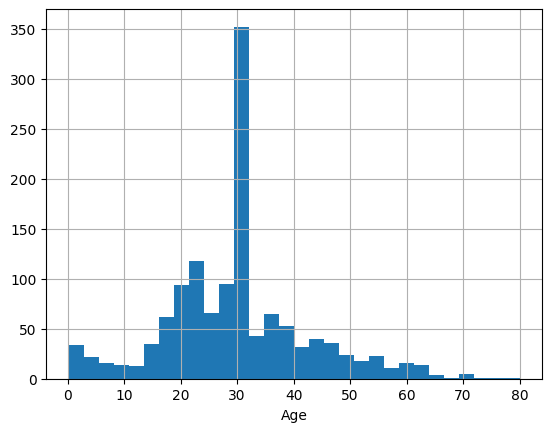

In [36]:
import matplotlib.pyplot as plt

# Histogram
com['Age'].hist(bins=30)
plt.xlabel('Age')
plt.show()

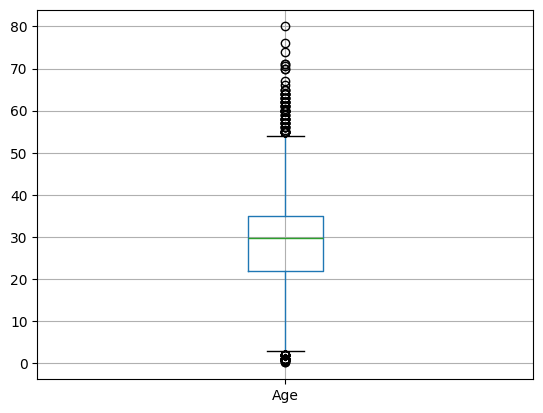

In [37]:
# Boxplot
com.boxplot(column='Age')
plt.show()

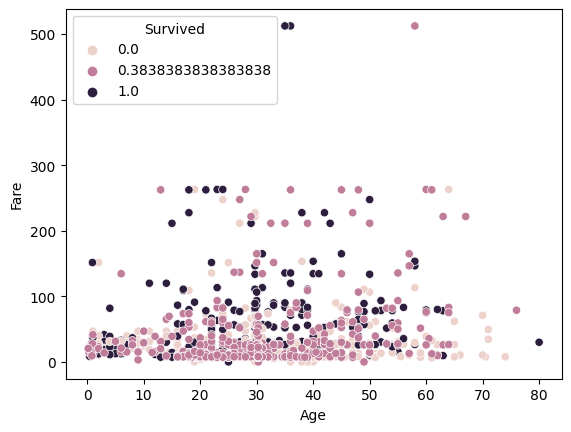

In [38]:
import seaborn as sns

# Scatter plot
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=com)
plt.show()

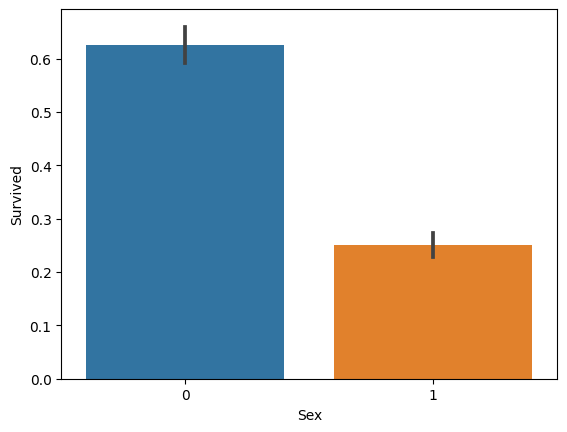

In [39]:
# Bar plot
sns.barplot(x='Sex', y='Survived', data=com)
plt.show()

Building Predictive Models:

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [41]:
# Convert 'Survived' column to integer type
com['Survived'] = com['Survived'].astype(int)

In [42]:
# Now split the dataset and continue with the model training
X = com.drop('Survived', axis=1)
y = com['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Build predictive models using LightGBM and XGBoost algorithms
lgbm = LGBMClassifier()
xgb = XGBClassifier()

In [44]:
# Train the models on the training set
lgbm.fit(X_train, y_train)
xgb.fit(X_train, y_train)

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\DELL\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\DELL\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp,

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 269, number of negative: 778
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7519
[LightGBM] [Info] Number of data points in the train set: 1047, number of used features: 2285
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.256925 -> initscore=-1.062015
[LightGBM] [Info] Start training from score -1.062015
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [45]:
# Evaluate their performance on the testing set
lgbm_preds = lgbm.predict(X_test)
xgb_preds = xgb.predict(X_test)

In [46]:
print("LightGBM Accuracy: ", accuracy_score(y_test, lgbm_preds))
print("XGBoost Accuracy: ", accuracy_score(y_test, xgb_preds))

LightGBM Accuracy:  0.8625954198473282
XGBoost Accuracy:  0.8702290076335878


In [49]:
from sklearn.model_selection import RandomizedSearchCV

# Use a smaller dataset for hyperparameter tuning
X_train_small = X_train.sample(frac=0.1, random_state=42)
y_train_small = y_train.sample(frac=0.1, random_state=42)

In [50]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [6, 8],
    'learning_rate': [0.1, 0.01]
}

In [51]:
# Use RandomizedSearchCV
random_lgbm = RandomizedSearchCV(lgbm, param_grid, cv=3, n_jobs=-1)
random_xgb = RandomizedSearchCV(xgb, param_grid, cv=3, n_jobs=-1)

In [52]:
# Fit the models
random_lgbm.fit(X_train_small, y_train_small)
random_xgb.fit(X_train_small, y_train_small)

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 33, number of negative: 72
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4921
[LightGBM] [Info] Number of data points in the train set: 105, number of used features: 2284
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.314286 -> initscore=-0.780159
[LightGBM] [Info] Start training from score -0.780159
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.01],
                                        'max_depth': [6, 8],
                                        'n_estimators': [100, 200]})

In [53]:
print("Best parameters for LightGBM: ", random_lgbm.best_params_)
print("Best parameters for XGBoost: ", random_xgb.best_params_)

Best parameters for LightGBM:  {'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.1}
Best parameters for XGBoost:  {'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.01}


Comparative Analysis:

Plotting the Confusion Matrix: 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


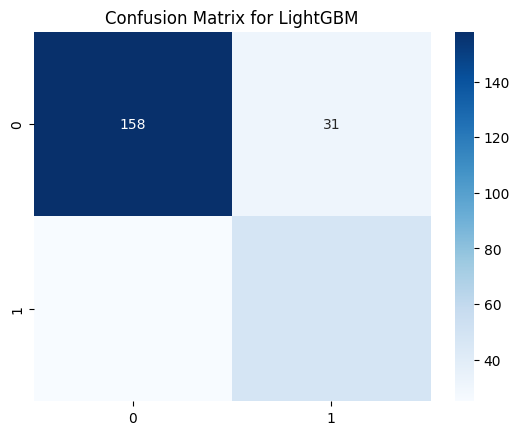

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix for both models
lgbm_cnf_matrix = confusion_matrix(y_test, random_lgbm.predict(X_test))
xgb_cnf_matrix = confusion_matrix(y_test, random_xgb.predict(X_test))

# Plot confusion matrix for LightGBM
sns.heatmap(lgbm_cnf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for LightGBM')
plt.show()

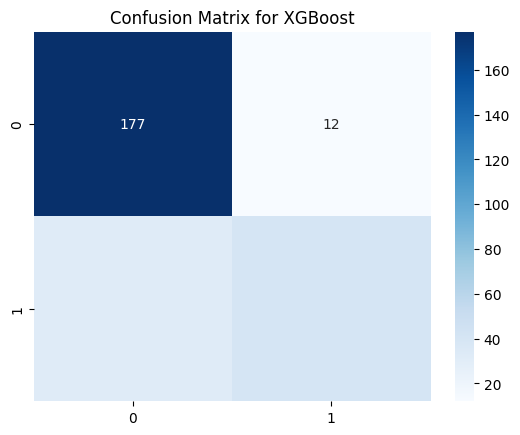

In [55]:
# Plot confusion matrix for XGBoost
sns.heatmap(xgb_cnf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for XGBoost')
plt.show()

Plotting the ROC Curve: 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


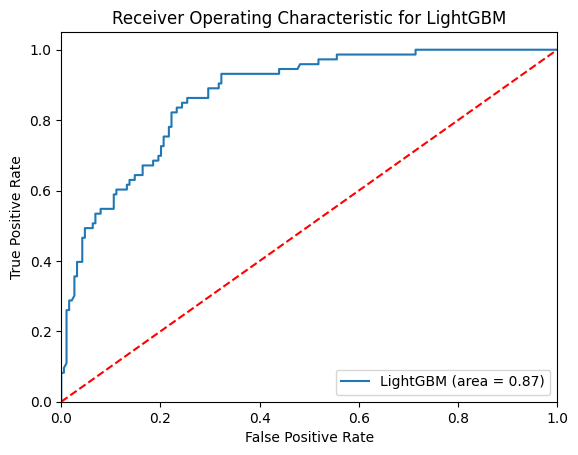

In [56]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve for both models
lgbm_fpr, lgbm_tpr, _ = roc_curve(y_test, random_lgbm.predict_proba(X_test)[:,1])
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, random_xgb.predict_proba(X_test)[:,1])

# Compute AUC for both models
lgbm_roc_auc = auc(lgbm_fpr, lgbm_tpr)
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)

# Plot ROC curve for LightGBM
plt.plot(lgbm_fpr, lgbm_tpr, label='LightGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for LightGBM')
plt.legend(loc="lower right")
plt.show()

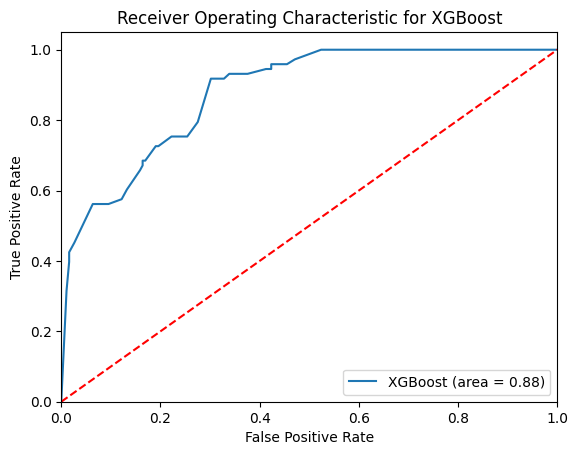

In [57]:
# Plot ROC curve for XGBoost
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for XGBoost')
plt.legend(loc="lower right")
plt.show()

Feature Importance:

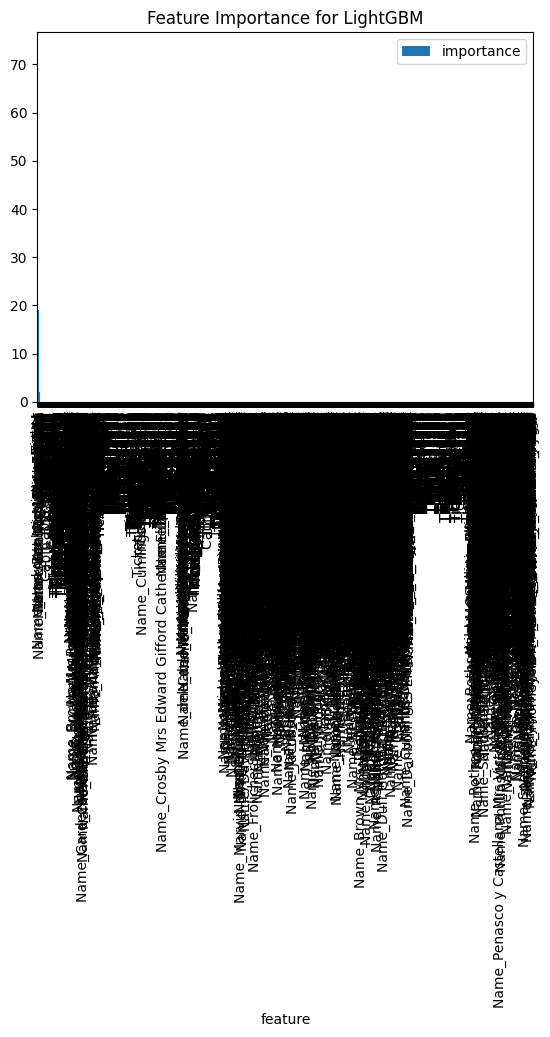

In [58]:
# Plot feature importance for LightGBM
lgbm_importance = pd.DataFrame({'feature': X_train.columns, 'importance': random_lgbm.best_estimator_.feature_importances_})
lgbm_importance.sort_values('importance', ascending=False).plot.bar(x='feature', y='importance', title='Feature Importance for LightGBM')
plt.show()

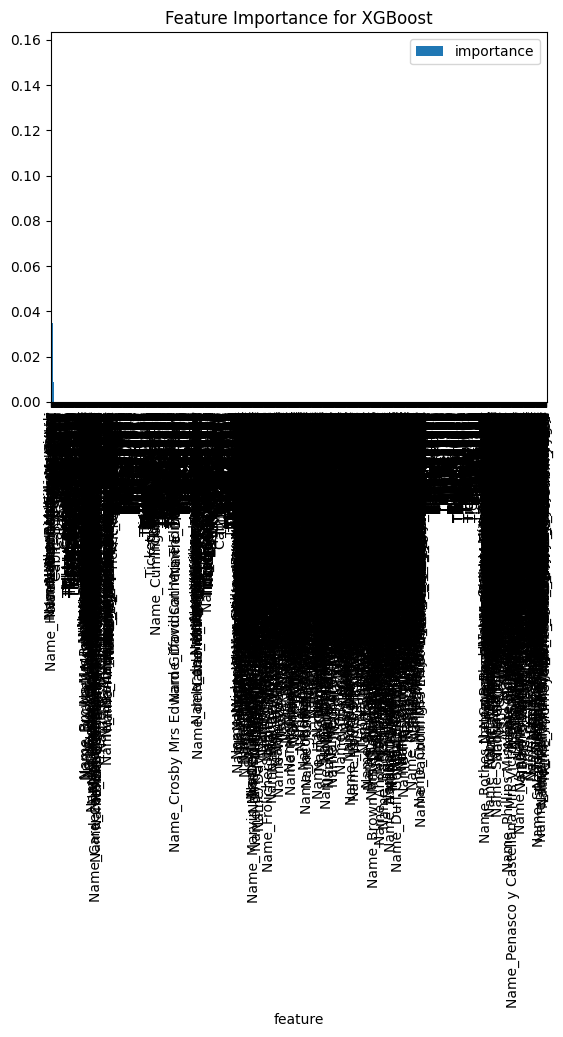

In [59]:
# Plot feature importance for XGBoost
xgb_importance = pd.DataFrame({'feature': X_train.columns, 'importance': random_xgb.best_estimator_.feature_importances_})
xgb_importance.sort_values('importance', ascending=False).plot.bar(x='feature', y='importance', title='Feature Importance for XGBoost')
plt.show()